Please follow the instructions carefully. Write all your code in a `Code` cell, and your explanations in a `Markdown` cell. Make sure that your code compiles correctly either by selecting a given cell and clicking the `Run` button, or by hitting `shift`+`enter` or `shift`+`return`.

### 1. Import `numpy`, `numpy.linalg`, `matplotlib.pyplot`, and `pandas`. Use the appropriate aliases when importing these modules.

In [2]:
# code for question 1
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import pandas as pd

### 2. Load the data from the file named `data_stock_returns.csv` into a `DatFrame` called `returns`. The file `data_stock_returns.csv` contains daily returns of a number of stocks selected from the S&P 500 universe. The rows of the csv file represent the returns over a number of days, and the columns represent individual stocks labeled by their NYSE ticker symbol, e.g., Apple stock is labeled `AAPL`.

In [3]:
# code for question 2
returns = pd.read_csv("data_stock_returns.csv", index_col=0)

### 3. View the `head` of the `returns` `DataFrame`

In [4]:
# code for question 3
print(returns.head())

                ATVI      CHTR     CMCSA       CTL       DIS     DISCA  \
Date                                                                     
2019-01-02  0.009829  0.010542  0.009354  0.018961 -0.006221  0.043115   
2019-01-03 -0.036155 -0.001703  0.007825  0.004524 -0.024525 -0.005824   
2019-01-04  0.039127  0.051651  0.033218  0.027974  0.030381  0.017754   
2019-01-07  0.027806 -0.004204 -0.010668  0.021706  0.008630  0.014810   
2019-01-08  0.029859 -0.002524  0.008152  0.025441  0.007748  0.026410   

               DISCK      DISH        EA        FB  ...       NEE        NI  \
Date                                                ...                       
2019-01-02  0.031979  0.035795  0.018333  0.034415  ... -0.023222 -0.011107   
2019-01-03  0.002515  0.020651 -0.020871 -0.029469  ... -0.002476  0.001196   
2019-01-04  0.019072  0.068034  0.070034  0.046061  ...  0.018249  0.017378   
2019-01-07  0.014271  0.011252  0.036862  0.000725  ... -0.001450  0.005467   
2019-01

### 4. View the `tail` of the `returns` `DataFrame`

In [5]:
# code for question 4
print(returns.tail())

                ATVI      CHTR     CMCSA       CTL       DIS     DISCA  \
Date                                                                     
2019-12-24 -0.001359  0.000291  0.009703 -0.002277  0.004207  0.003943   
2019-12-26  0.001359  0.010077  0.009833 -0.003807  0.002818  0.007540   
2019-12-27  0.005081 -0.004209  0.002887  0.023371  0.000343 -0.004517   
2019-12-30 -0.005251 -0.001262  0.001772 -0.024134 -0.013678 -0.011231   
2019-12-31  0.009129  0.004132 -0.004659  0.008362  0.005964 -0.000611   

               DISCK      DISH        EA        FB  ...       NEE        NI  \
Date                                                ...                       
2019-12-24  0.007496  0.001956  0.007026 -0.005154  ...  0.007219 -0.000729   
2019-12-26  0.004212  0.008617 -0.000369  0.012933  ...  0.006011 -0.002921   
2019-12-27 -0.005511 -0.004994 -0.000738  0.001491  ...  0.002271 -0.002196   
2019-12-30 -0.008161 -0.015700 -0.013930 -0.017891  ... -0.005043  0.008393   
2019-12

### 5. How many stocks are in this `DataFrame`?

In [6]:
# code for question 5
print(len(returns.columns)) 
# I checked my answers in excel. 
#There are exactly 488 columns if we omit the first column which is the date.

488


**ANSWER FOR QUESTION 5**: There are 488 stocks

### 6. Over how many days are these stock returns reported?

In [7]:
# code for question 6
print(len(returns))
# I checked my answers in excel. 
#There are exactly 252 row if we omit the first row.

252


### 7. Extract the returns of the Amazon stock only, which has a ticker symbol `AMZN`. Save it in a `Series` called `amzn_returns`.

In [8]:
# code for question 7
amzn_returns = returns["AMZN"]

### 8. Plot the Amazon stock returns extracted in the above cell. 

<AxesSubplot:xlabel='Date'>

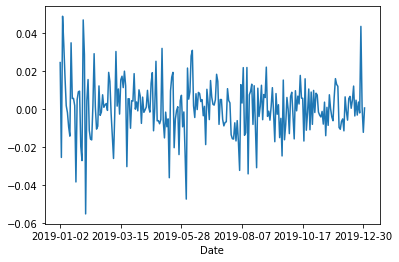

In [9]:
# code for question 8
amzn_returns.plot()

### 9. Plot the cumulative sum of the Amazon stock returns using the method `.cumsum()` which acts directly on the `amzn_returns` `Series`.

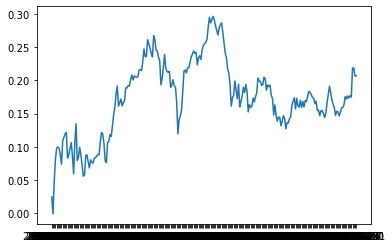

In [10]:
# code for question 9
plt.plot(amzn_returns.cumsum())

In [14]:
# the module below will allow us to perform linear regression
import statsmodels.api as sm

The function `lin_reg(x,y)` given below performs ordinary least squares (OLS) linear regression using `sm.OLS` from the `statsmodels.api` module.

The code enclosed in `''' '''` is the docstring of the function `lin_reg`.

`x` in the `lin_reg` function is a matrix that contains the regressors, and `y` represents the vector containing the dependent variable. Note that `x` might contain one vector or multiple vectors. In the case that `x` contains one vector $x$, the regression gives:

$$ y = \beta_0 + \beta_1 x $$

In the case that `x` contains multiple vectors $x_1, \dots, x_k$, the regression becomes:

$$ y = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k$$

The $\beta$'s are the regression coefficients obtained using least squares. Note that `sm.add_constant` is used in the function below to make `x` look like the matrix $A$ we use in least squares, whose first column contains all ones.

In [12]:
def lin_reg(x, y):
    '''
    oridinary linear regression using least-squares
    
    Parameters
    ----------  
    x: regressors (numpy array)
    y: dependent variable (numpy array)
    
    Returns
    -------
    coefficients: regression coefficients (pandas Series)
    residuals: regression residuals (numpy array)
    r_squared: correlation coefficient (float)
    
    '''
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    coefficients = model.params
    residuals = model.resid
    r_squared = model.rsquared
    return coefficients, residuals, r_squared

### 10. Let's try to use the obove function. Extract (as numpy array) the stock returns of:

- Apple (ticker symbol `AAPL`) and call it `aapl`
- Intel (ticker symbol `INTC`) and call it `intc`
- Microsoft (ticker symbol `MSFT`) and call it `msft`
- IBM (ticker symbol `IBM`) and call it `ibm`

### Let `y` be the Apple stock returns, and `x` be the Intel stock returns. Use the `lin_reg` function defined above to find $y=\beta_0 + \beta_1 x$. 

In [15]:
# code for question 10
y = returns['AAPL'].values
x = returns['INTC'].values
coefficients,residuals,r_squared = lin_reg(x,y)
line1 = coefficients[0]+coefficients[1]*x

### 11. Plot the cumulative sum of the Apple returns prediction from least squares on top of the actual Apple returns. How well do the Intel stock returns describe the Apple stock returns?

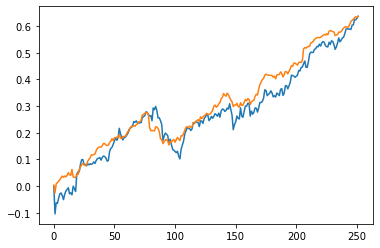

In [16]:
# code for question 11
aapl = returns['AAPL'].to_numpy()
plt.plot(aapl.cumsum())
plt.plot(line1.cumsum())

### 12. Now, let `y` be the Apple stock returns, and `x` be the Intel, Microsoft, and IBM stock returns. Use the `lin_reg` function defined above to find $y=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$, where $x_1$ represents Intel returns, $x_2$ represents Microsoft returns, and $x_3$ represents IBM returns. 

In [17]:
# code for question 12
y = returns['AAPL'].values
ibm = returns['IBM'].values
intc = returns ['INTC'].values
msft = returns['MSFT'].values
x = returns [['INTC','MSFT','IBM']].values
coefficients,residuals,r_squared = lin_reg(x,y)
line2 = coefficients[0] + intc*coefficients[1] + msft*coefficients[2] + ibm*coefficients[3]

### 13. Plot the cumulative sum of the Apple returns prediction from least squares on top of the cumulative sum of actual Apple returns. How well do the Intel, Microsoft, and IBM stock returns describe the Apple stock returns?

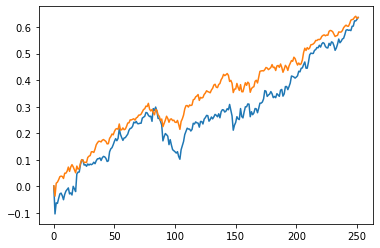

In [18]:
# code for question 13
plt.plot(aapl.cumsum())
plt.plot(line2.cumsum())

Answer for Question 13:

The R square value is 0.47. Line 2 shows a weaker correlation than Line 1. It is difficult to quantify "how well." It can be conlcuded that Intel, Microsoft and IBM stock returns describle worse than line 1 do.

The file `SPY.csv` contains the prices of SPDR S&P 500 ETF Trust. This Exchage Traded Fund (ETF) contains a collection of assets currently present in the S&P 500 index. 

### 14. Load `SPY.csv` into a DataFrame called `spy_prices` using the `read_csv` method in `pandas`. Make sure to make the 'Date' column to be your index column. To do that, read the docstring for `read_csv`. 

In [99]:
# code for question 14
spy_prices = pd.read_csv("SPY.csv",index_col=0)

### 15. Once you have downloaded the file into the `DataFrame`, observe all the available prices and dates. Show the head of the `DataFrame`, and then answer the following questions:

(a) Which prices are reported?

Answer to 15(a): High, Low, Open, Close, Volume, Adj Close

(b) From which date to which date are these prices reported?

From 2015-01-02 to 2015-01-08

In [100]:
# code for question 15
spy_prices.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,206.880005,204.179993,206.380005,205.429993,121465900.0,184.260223
2015-01-05,204.369995,201.350006,204.169998,201.720001,169632600.0,180.932541
2015-01-06,202.720001,198.860001,202.089996,199.820007,209151400.0,179.228363
2015-01-07,202.720001,200.880005,201.419998,202.309998,125346700.0,181.461731
2015-01-08,206.160004,203.990005,204.009995,205.899994,147217800.0,184.681763


**ANSWER FOR QUESTION 15**: 

Answer to 15(a): High, Low, Open, Close, Volume, Adj Close

Answer to 15(b): From 2015-01-02 to 2015-01-08

### 16. Retain only the Adjusted Close price in the `spy_prices` `DataFrame`. Call the resulting `Series` `spy_adjclose`.

In [107]:
# code for question 16
spy_adjclose = spy_prices['Adj Close']

### 17. Now, using the `pct_change` method in `pandas`, compute the returns on the Adjusted Close prices of SPY, and only retain the returns from '2019-01-01' to '2020-01-01'. Call the `Series` obtained `spy_returns`.

In [108]:
# code for question 17
spy_returns = spy_adjclose.pct_change()
spy_returns = spy_returns['2019-01-01':'2020-01-01']
print (spy_returns)

Date
2019-01-02    0.001040
2019-01-03   -0.023863
2019-01-04    0.033496
2019-01-07    0.007885
2019-01-08    0.009395
                ...   
2019-12-24    0.000031
2019-12-26    0.005323
2019-12-27   -0.000248
2019-12-30   -0.005513
2019-12-31    0.002429
Name: Adj Close, Length: 252, dtype: float64


### 18. Perform SVD on `returns` data that contain assets from the S&P 500. Retain the left singular vector corresponding to the largest singular value and call is `u_sigma1`.

In [109]:
# code for question 18
u,e,d = linalg.svd(returns)
u_sigma1 = u.T[0]

### 19. `u_sigma1` is thought to track the market. To test that, we will perform a regression of `spy_returns` against this first left singular vector by letting `y=spy_returns` and `x=u_sigma1` and computing

### $$ y = \beta_0 + \beta_1 x$$
### using least squares regression.

In [110]:
# code for question 19
y = spy_returns
x = u_sigma1
coefficients,residual,r_squared = lin_reg(x,y)

### 20. Plot the cumulative sum of the result from the regression on top of the cumulative sum of `spy_returns`. What do you notice?

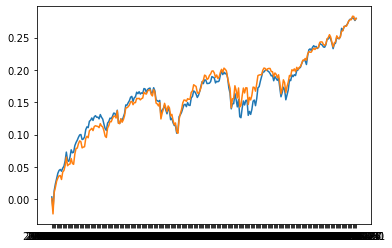

In [111]:
# code for question 20
line3 = coefficients[0] + coefficients[1]*x
plt.plot(line3.cumsum())
plt.plot(y.cumsum())

**ANSWER FOR QUESTION 20**:

Generally, by observing the two graphs,the spy_returns and regression graphs look similar;

The R sqaured value is 0.89 (very close to 1);

The correlation is strong.

# Congratulations! You have just implemented your first statistical Capital Asset Pricing Model (CAPM) to the S&P 500 market.